In [112]:
import numpy as np
import pandas as pd
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from sklearn.model_selection import train_test_split

In [113]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train=np.matrix(train)
test=np.matrix(test)

In [114]:
train.shape

(42000, 785)

In [115]:
test.shape

(28000, 784)

In [116]:
features=train[:,1:785]
label=train[:,0:1]
trainx,valx,trainy,valy = train_test_split(features, label, 
                                                test_size = 0.2,
                                                random_state = 1212)

In [117]:
trainx.shape,trainy.shape,valx.shape,valy.shape

((33600, 784), (33600, 1), (8400, 784), (8400, 1))

In [118]:
trainx=trainx.astype('float32')/255
valx=valx.astype('float32')/255
test=test.astype('float32')/255


In [119]:
trainy = keras.utils.to_categorical(trainy,10)
valy= keras.utils.to_categorical(valy,10)

In [120]:
trainy,valy

(array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]]),
 array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.]]))

In [121]:
iin=784
l1=400
l2=200
l3=200
l4=100
l5=100
l6=100
out=10



In [122]:
inp=Input(shape=(iin,))

In [123]:
m=Dense(l1,activation='relu',name='hiddenlayer1')(inp)

In [124]:
m=Dense(l2,activation='relu',name='hiddenlayer2')(m)

In [125]:
m=Dense(l3,activation='relu',name='hiddenlayer3')(m)

In [126]:
m=Dense(l4,activation='relu',name='hiddenlayer4')(m)

In [127]:
m=Dense(l5,activation='relu',name='hiddenlayer5')(m)

In [128]:
m=Dense(l6,activation='relu',name='hiddenlayer6')(m)

In [129]:
output = Dense(out, activation='softmax', name = "OutputLayer")(m)

In [130]:
model = Model(inp, output)

In [131]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
hiddenlayer1 (Dense)         (None, 400)               314000    
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 200)               80200     
_________________________________________________________________
hiddenlayer3 (Dense)         (None, 200)               40200     
_________________________________________________________________
hiddenlayer4 (Dense)         (None, 100)               20100     
_________________________________________________________________
hiddenlayer5 (Dense)         (None, 100)               10100     
_________________________________________________________________
hiddenlayer6 (Dense)         (None, 100)               10100     
__________

In [132]:
learning_rate = 0.01
training_epochs = 20
batch_size = 100
adam = optimizers.Adam(lr=learning_rate)

In [133]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [134]:
details=model.fit(trainx,trainy,
                      batch_size = batch_size,
                      epochs = training_epochs,
                      verbose = 2,
                      validation_data=(valx,valy))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
3s - loss: 0.3380 - acc: 0.9003 - val_loss: 0.1876 - val_acc: 0.9435
Epoch 2/20
3s - loss: 0.1198 - acc: 0.9642 - val_loss: 0.1107 - val_acc: 0.9671
Epoch 3/20
3s - loss: 0.0822 - acc: 0.9751 - val_loss: 0.1037 - val_acc: 0.9696
Epoch 4/20
3s - loss: 0.0663 - acc: 0.9788 - val_loss: 0.1067 - val_acc: 0.9702
Epoch 5/20
3s - loss: 0.0453 - acc: 0.9854 - val_loss: 0.1036 - val_acc: 0.9702
Epoch 6/20
3s - loss: 0.0394 - acc: 0.9875 - val_loss: 0.0984 - val_acc: 0.9732
Epoch 7/20
3s - loss: 0.0368 - acc: 0.9882 - val_loss: 0.1066 - val_acc: 0.9746
Epoch 8/20
3s - loss: 0.0328 - acc: 0.9901 - val_loss: 0.0983 - val_acc: 0.9755
Epoch 9/20
3s - loss: 0.0284 - acc: 0.9910 - val_loss: 0.0895 - val_acc: 0.9786
Epoch 10/20
3s - loss: 0.0279 - acc: 0.9908 - val_loss: 0.1014 - val_acc: 0.9742
Epoch 11/20
3s - loss: 0.0216 - acc: 0.9937 - val_loss: 0.1113 - val_acc: 0.9760
Epoch 12/20
3s - loss: 0.0192 - acc: 0.9937 - val_loss: 0.1282 - val_

In [146]:
test_pred = pd.DataFrame(model.predict(test, batch_size=200))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.head()

,0
0,2
1,0
2,9
3,0
4,3


In [147]:
import matplotlib.pyplot as  pt
%matplotlib inline

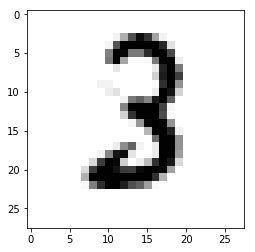

In [154]:
im=test[4,:]
im.shape=(28,28)
pt.imshow(255-im,cmap='gray')